In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38856,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


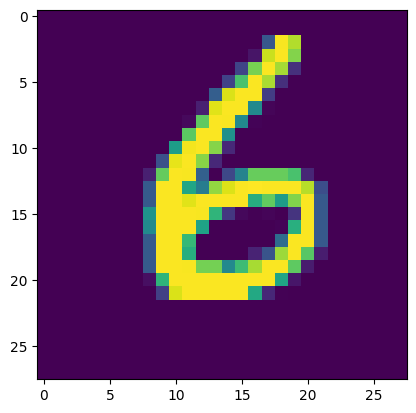

In [6]:
plt.imshow(df.iloc[40213,1:].values.reshape(28,28))
plt.show()

In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [9]:
x_train.shape

(33600, 784)

In [10]:
x_test.shape

(8400, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
import time 
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

12.130560159683228


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

<br>
here using the scalling 

In [16]:
from sklearn.preprocessing  import StandardScaler 
scaler = StandardScaler()

In [17]:
# here the data maked in the mean cernting in the data and also it convering into the range in the give data
x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# pac using in this for the reducing the columns for best 100 data in the columns in the dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [19]:
x_train_trf  = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [20]:
x_train_trf.shape

(33600, 200)

In [21]:
x_test_trf.shape

(8400, 200)

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [23]:
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
for i in range(1,785):
       pca = PCA(n_components = i)
       x_train_trf  = pca.fit_transform(x_train)
       x_test_trf = pca.transform(x_test)
       knn = KNeighborsClassifier()
       knn.fit(x_train_trf,y_train)
       y_pred = knn.predict(x_test_trf)         
       accuracy_score(y_test,y_pred)
               
       print(accuracy_score(y_test,y_pred))

0.25702380952380954
0.3242857142857143
0.5102380952380953
0.6664285714285715
0.7379761904761905
0.8232142857142857
0.8433333333333334
0.8721428571428571
0.8860714285714286
0.9052380952380953
0.9127380952380952
0.9185714285714286
0.9271428571428572
0.9353571428571429
0.9383333333333334
0.9377380952380953
0.9402380952380952
0.9401190476190476
0.9429761904761905
0.9438095238095238
0.9432142857142857
0.9439285714285715
0.9447619047619048
0.9460714285714286
0.9472619047619047
0.9478571428571428
0.9477380952380953
0.9472619047619047
0.9495238095238095
0.9495238095238095
0.9504761904761905
0.9515476190476191
0.9502380952380952
0.9498809523809524
0.9508333333333333
0.9519047619047619
0.9513095238095238
0.9522619047619048


<br>
here we ploting the 2D data byvrate data 

In [24]:
# transforming to a 2D coordinate system 
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_tef = pca.transform(x_test)

In [25]:
df = pd.DataFrame(x_train_trf, columns=['Feature 1', 'Feature 2'])
df.head()

,Feature 1,Feature 2
0,-2.718625,-0.490485
1,-0.676972,-6.755628
2,-3.033239,6.510708
3,-0.203497,5.414609
4,-7.574487,5.609540


In [26]:
x_train_trf

array([[-2.71862465, -0.4904847 ],
       [-0.67697157, -6.75562797],
       [-3.03323893,  6.51070839],
       ...,
       [ 2.14884265,  0.78165571],
       [ 1.05957293,  0.94727721],
       [17.70256632,  1.96154119]])

In [27]:
# Convert the DataFrame columns to strings
df['Feature 1'] = df['Feature 1'].astype(str)
df['Feature 2'] = df['Feature 2'].astype(str)

In [ ]:
# Create the scatter plot using Plotly Express
import plotly.express as px
fig = px.scatter(df, x='Feature 1', y='Feature 2', color='Feature 2',
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [28]:
from matplotlib import pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Feature 2',
                palette='tab10', legend='full')  # Customize hue and palette as needed
plt.title('Scatter Plot using Seaborn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Feature 2')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 1057x703807 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>